In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#load
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#freeze base model
base_model.trainable = False
#summarize
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/scraped dataset",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed = 42,
    validation_split=.20,
    subset = "training",
    interpolation="bilinear",
    follow_links=False,
)

FileNotFoundError: ignored

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/scraped dataset",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed = 42,
    validation_split=.20,
    subset = "validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 1293 files belonging to 3 classes.
Using 258 files for validation.


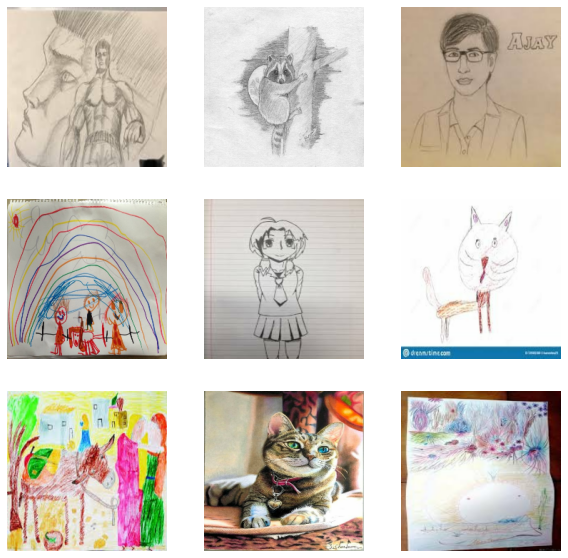

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
transfer_model = model.fit(train_ds, epochs=13, validation_data=val_ds)

Epoch 1/13
33/33 [==============================] - 36s 1s/step - loss: 1.4169 - accuracy: 0.3981 - val_loss: 1.1388 - val_accuracy: 0.4922
Epoch 2/13
33/33 [==============================] - 41s 1s/step - loss: 1.1363 - accuracy: 0.4812 - val_loss: 0.8323 - val_accuracy: 0.6279
Epoch 3/13
33/33 [==============================] - 40s 1s/step - loss: 1.0879 - accuracy: 0.5266 - val_loss: 0.8034 - val_accuracy: 0.6357
Epoch 4/13
33/33 [==============================] - 51s 2s/step - loss: 1.0388 - accuracy: 0.5411 - val_loss: 0.7651 - val_accuracy: 0.6512
Epoch 5/13
33/33 [==============================] - 55s 2s/step - loss: 0.8854 - accuracy: 0.6126 - val_loss: 0.7494 - val_accuracy: 0.6705
Epoch 6/13
33/33 [==============================] - 55s 2s/step - loss: 0.8493 - accuracy: 0.6155 - val_loss: 0.7310 - val_accuracy: 0.6822
Epoch 7/13
33/33 [==============================] - 56s 2s/step - loss: 0.8073 - accuracy: 0.6531 - val_loss: 0.6982 - val_accuracy: 0.7054
Epoch 8/13
33/33 [==